### V7 V10 V4 V14 ARE FEATURES MORE RESPONSIBEL ACC TO DTREES AND BAGGING

In [1]:
import pandas as pd
df = pd.read_csv(r'..\data\processed\scaledDataForUSMPWithOutlier.csv')


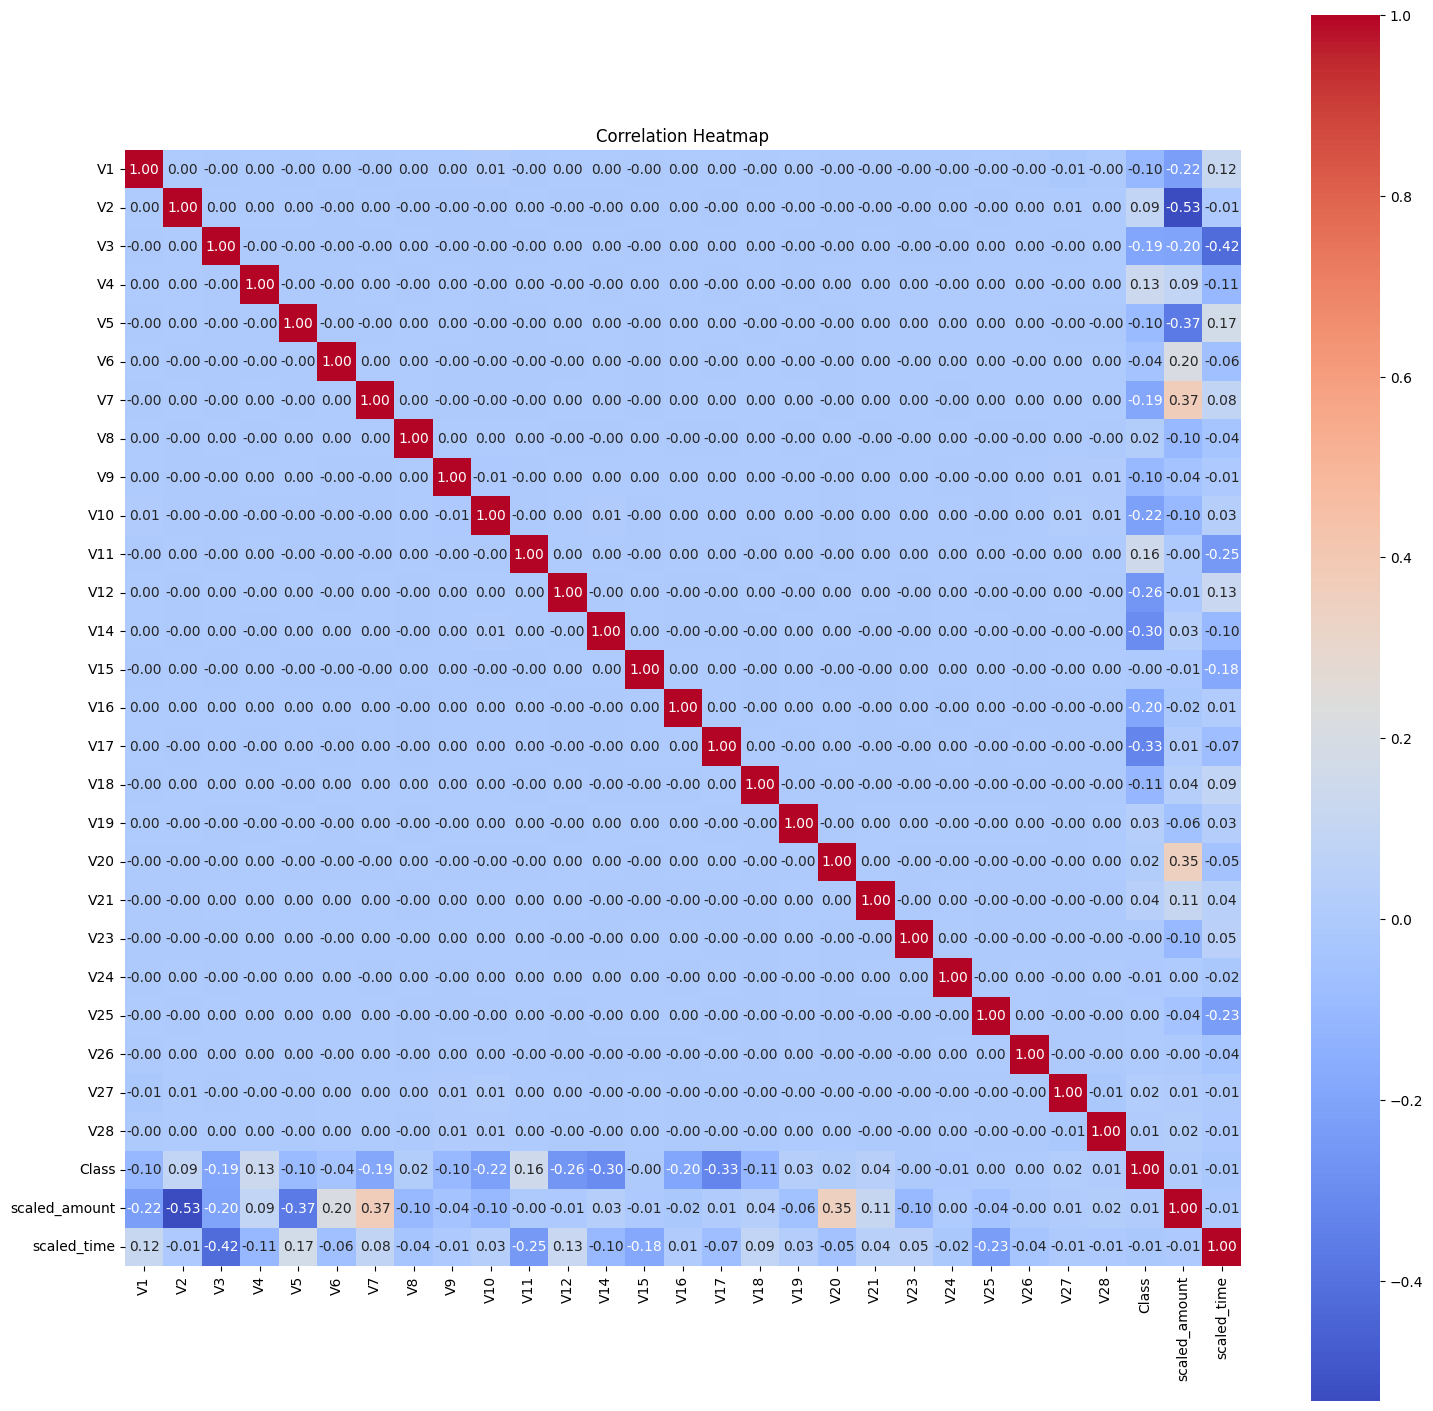

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
# from past things
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(18, 18))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, square=True)
plt.title('Correlation Heatmap')
plt.show()

In [3]:
target_feature = 'Class'  
sorted_corr = corr_matrix[target_feature].sort_values()  # Sort in ascending order


sorted_corr_df = sorted_corr.to_frame().rename(columns={target_feature: 'Correlation'})


In [4]:
sorted_corr_df

,Correlation
V17,-0.327250
V14,-0.303800
V12,-0.261114
V10,-0.218691
V16,-0.196946
V3,-0.193538
V7,-0.187792
V18,-0.111743
V1,-0.102031
V9,-0.098061


# 17,14,12,10,11,4,2  are features I am taking for corr as they are most relevant towards prediction
# AIm-> accuracy increase!

C:\Users\Charanjeet Juneja\AppData\Local\Temp\ipykernel_6980\3584250242.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Class'], y=df[feature], palette="Set2")
C:\Users\Charanjeet Juneja\AppData\Local\Temp\ipykernel_6980\3584250242.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Class'], y=df[feature], palette="Set2")
C:\Users\Charanjeet Juneja\AppData\Local\Temp\ipykernel_6980\3584250242.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Class'], y=df[feature], palette="Set2")
C:\Users\Charanjeet Juneja\AppData\Lo

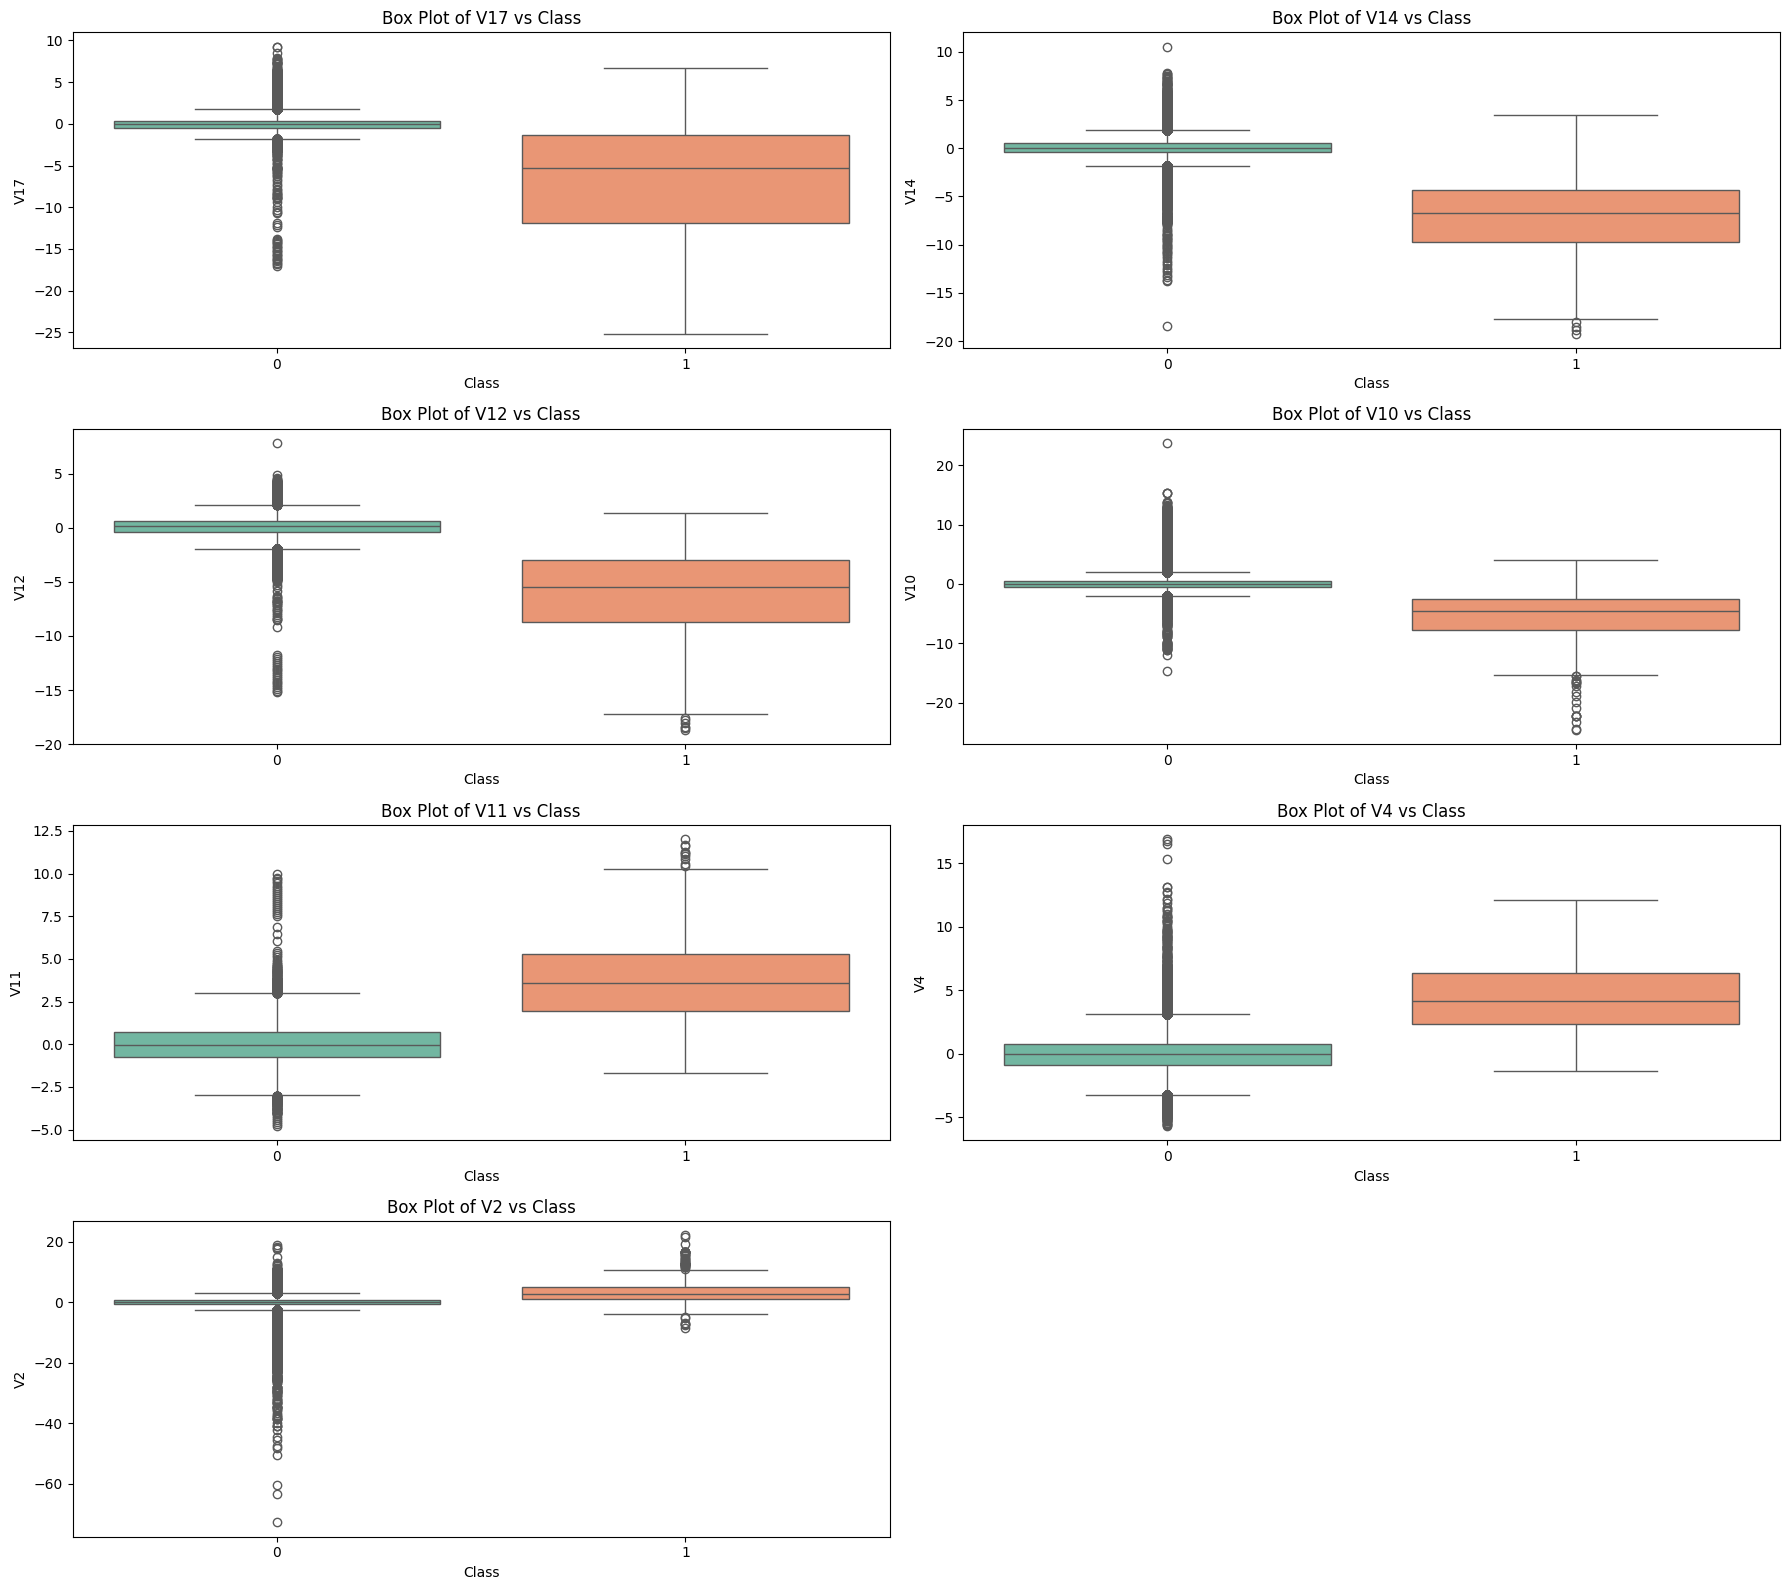

In [5]:
features = ['V17', 'V14', 'V12', 'V10', 'V11', 'V4', 'V2']

plt.figure(figsize=(18, 16))
for i, feature in enumerate(features, 1):
    plt.subplot(4, 2, i)  
    sns.boxplot(x=df['Class'], y=df[feature], palette="Set2")
    plt.title(f'Box Plot of {feature} vs Class')

plt.tight_layout()
plt.show()

In [7]:
import pandas as pd

columns_to_filter = ['V17', 'V14', 'V12', 'V10', 'V11', 'V4', 'V2']

mask_outliers = (df['Class'] == 0) & ((df[columns_to_filter] > 5) | (df[columns_to_filter] < -5)).any(axis=1)
df_cleaned = df[~mask_outliers].reset_index(drop=True)

print(f"Original shape: {df.shape}, New shape: {df_cleaned.shape}")


Original shape: (283745, 29), New shape: (278490, 29)


In [10]:
print(mask_outliers.sum())

5255


In [12]:
import pandas as pd

# Assuming df is your dataset
columns_to_filter = ['V17', 'V14', 'V12', 'V10', 'V11', 'V4', 'V2']
log_file = "removed_outliers.log"

# Open the log file
with open(log_file, "w") as log:
    log.write("Removed Outliers Log\n")
    log.write("=" * 80 + "\n")


    for index, row in df.iterrows():
        if row['Class'] == 0:  
            if any(row[col] > 5 or row[col] < -5 for col in columns_to_filter):  
                values_str = ", ".join([f"{col}={row[col]}" for col in columns_to_filter])
                log.write(f"Row {index} removed: {values_str}\n")
mask_outliers = (df['Class'] == 0) & ((df[columns_to_filter] > 5) | (df[columns_to_filter] < -5)).any(axis=1)
df_cleaned = df[~mask_outliers].reset_index(drop=True)

print(f"Log file '{log_file}' has been created.")
print(f"Original shape: {df.shape}, New shape: {df_cleaned.shape}")


Log file 'removed_outliers.log' has been created.
Original shape: (283745, 29), New shape: (278490, 29)


### Now most of them dont have much outliers so I can again do random undersampling


In [14]:
df=df_cleaned.copy()

In [15]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-0.375514,0.907504,1.079103,-0.413849,0.480315,0.080346,0.532544,0.198103,-0.460096,-0.120585,...,-0.261015,-0.166065,-0.878194,-0.093717,0.128657,0.254460,0.097417,0,-0.244021,-0.182961
1,0.088659,1.391381,-0.909840,0.882853,1.640724,-0.408531,1.440041,-0.244444,0.355858,-1.096048,...,0.057893,-0.042953,0.529083,-0.674236,-0.711382,0.245712,0.282911,0,0.227197,0.289403
2,1.936495,0.652187,-1.463777,3.811637,0.826842,-0.575351,0.733978,-0.251709,-1.202035,1.555541,...,0.126932,0.069081,1.113291,0.340075,0.116542,-0.094641,-0.057366,0,-0.021830,0.403401
3,1.274325,-1.046037,0.673192,-0.505360,-1.186838,0.513984,-1.209090,0.391635,0.118750,0.556306,...,0.110515,-0.121271,-0.289985,0.509243,-0.053447,0.036685,-0.004152,0,-0.029060,-0.089001
4,1.093639,-0.248331,0.612403,0.729435,-0.918993,-0.816926,-0.215800,-0.053365,0.519912,-0.056748,...,0.036837,-0.050192,0.390942,0.259114,0.343442,-0.039886,0.029889,0,0.805061,-0.283268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278485,1.887356,0.595489,-0.906208,3.516518,0.764441,0.226432,0.242288,-0.033473,-1.500697,1.685988,...,0.292258,0.069790,0.769422,0.125414,0.072855,-0.053585,-0.050945,0,-0.042825,0.631985
278486,1.122458,-0.305869,1.325175,0.811526,-1.260822,-0.135795,-0.815839,0.283976,0.866514,-0.031002,...,-0.042264,0.060153,0.533611,0.149887,0.291496,0.004343,0.016178,0,-0.178115,-0.546310
278487,-0.951867,1.819947,1.427060,4.401225,0.509573,3.068836,-0.992043,0.223683,-0.216643,0.902137,...,1.030329,0.185851,-0.404169,-0.911083,0.450149,-0.073010,0.120453,0,-0.125000,0.065614
278488,-0.355813,1.037123,1.142809,-0.139668,0.223897,-0.447363,0.572302,0.126015,-0.554029,-0.328525,...,-0.242970,-0.068094,-0.118282,-0.156061,0.079906,0.238000,0.083122,0,-0.252086,-0.976483


C:\Users\Charanjeet Juneja\AppData\Local\Temp\ipykernel_6980\1258478606.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Class'], y=df[feature], palette="Set2")
C:\Users\Charanjeet Juneja\AppData\Local\Temp\ipykernel_6980\1258478606.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Class'], y=df[feature], palette="Set2")
C:\Users\Charanjeet Juneja\AppData\Local\Temp\ipykernel_6980\1258478606.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Class'], y=df[feature], palette="Set2")
C:\Users\Charanjeet Juneja\AppData\Lo

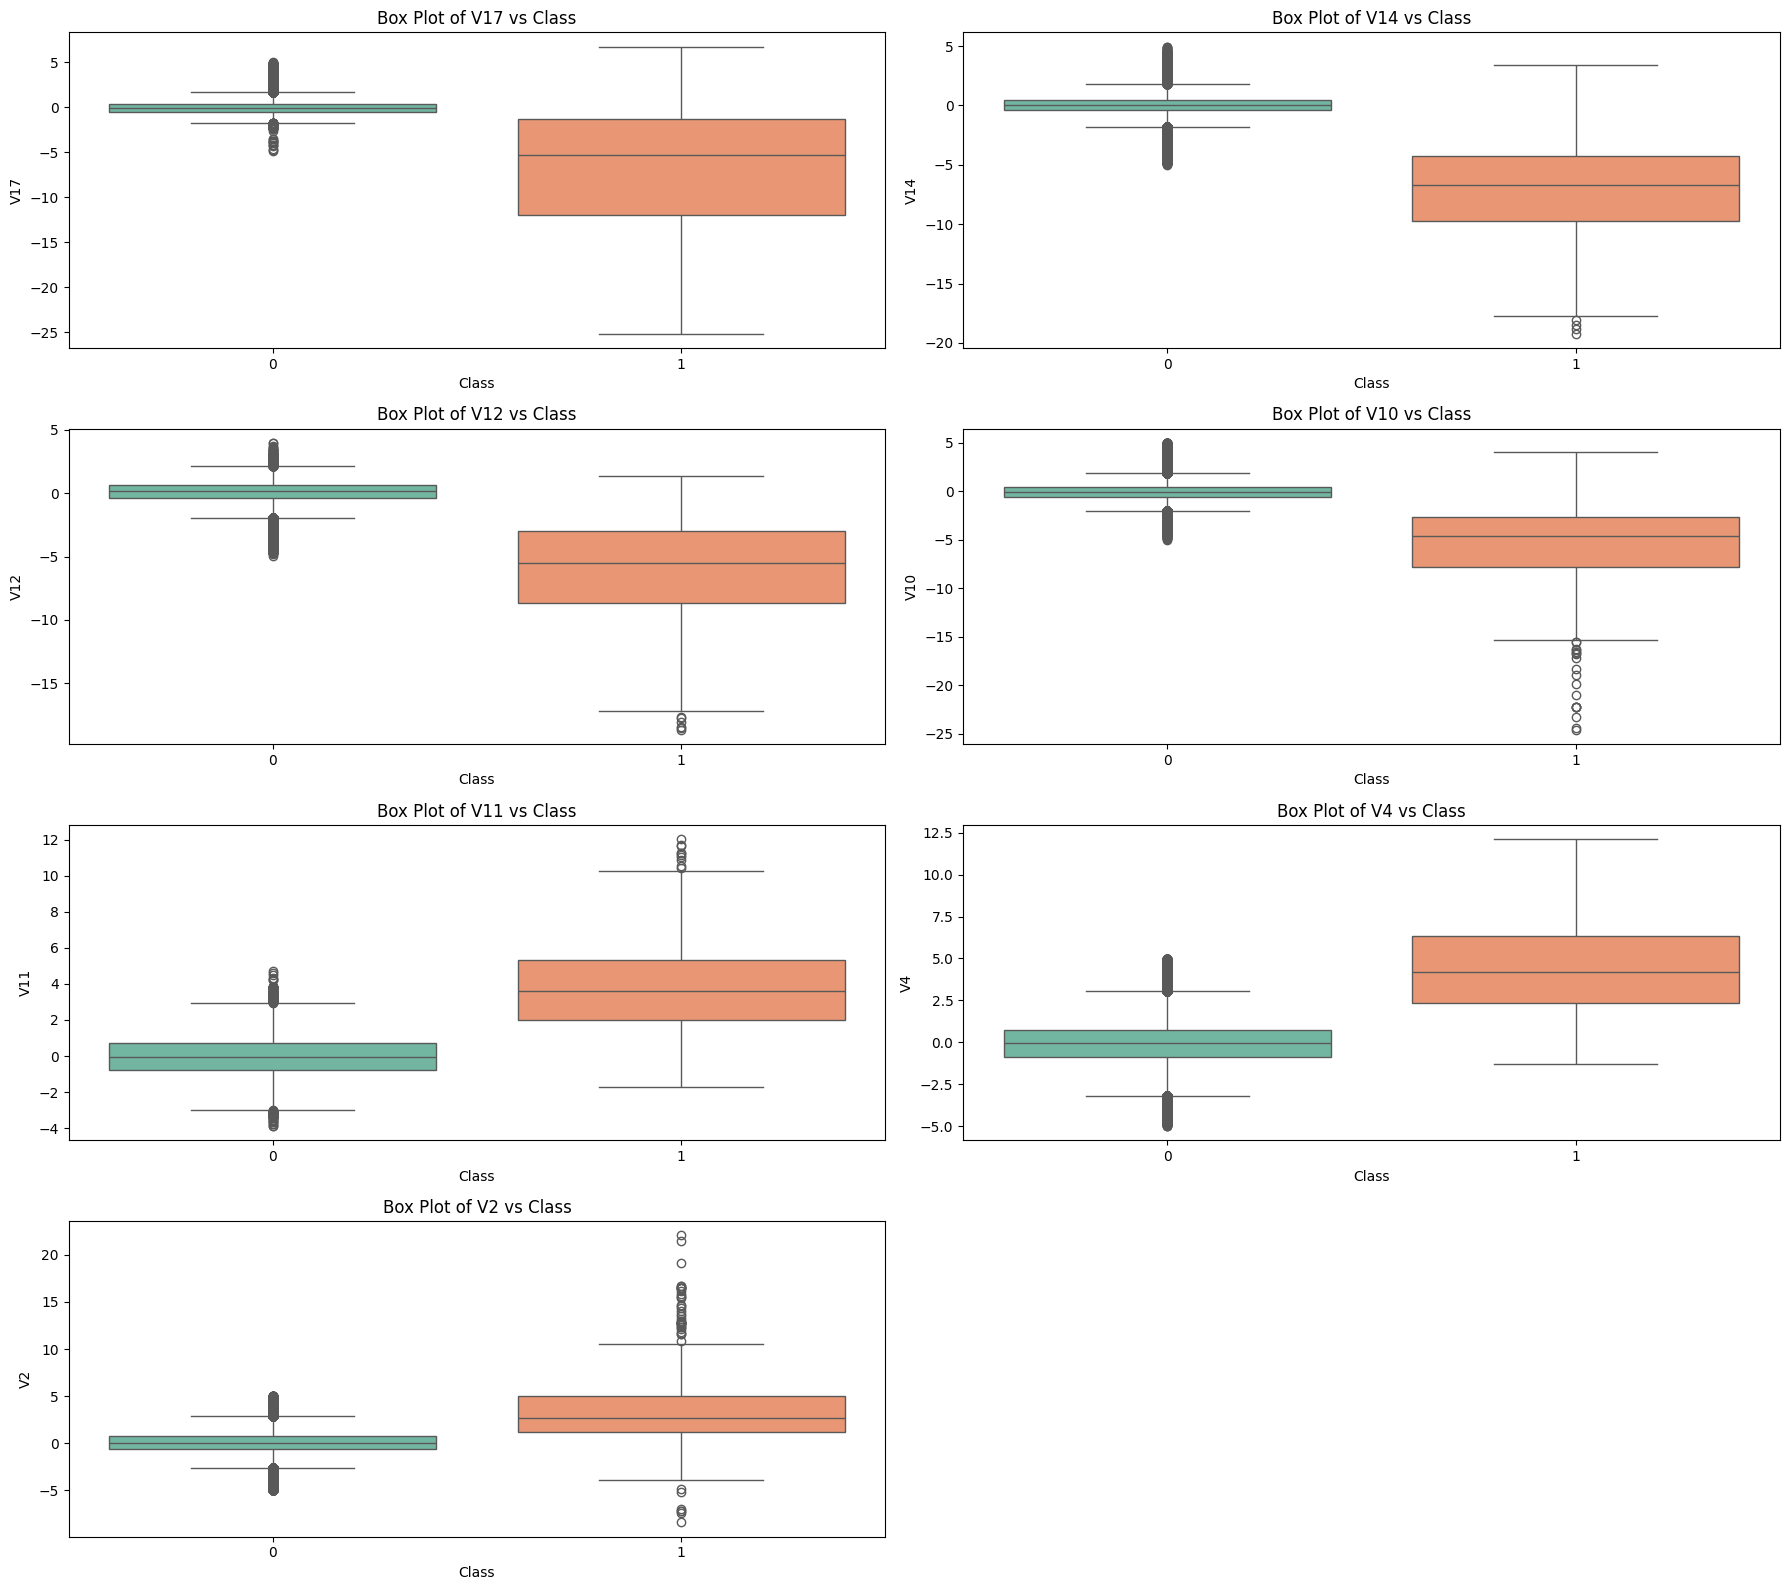

In [16]:
features = ['V17', 'V14', 'V12', 'V10', 'V11', 'V4', 'V2']

plt.figure(figsize=(18, 16))
for i, feature in enumerate(features, 1):
    plt.subplot(4, 2, i)  
    sns.boxplot(x=df['Class'], y=df[feature], palette="Set2")
    plt.title(f'Box Plot of {feature} vs Class')

plt.tight_layout()
plt.show()

### now outliers have significantly decreased

### Since class 1 already has less data , i have not done outlier removal from 1 as of now, will do if necessary but then there will be so much loss which we dont need at all

In [17]:
df = df.sample(frac=1)


fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])


new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
260108,1.914211,0.447895,-1.306622,3.671559,0.692274,-0.114467,0.380360,-0.047331,-1.118577,1.733572,...,0.282665,-0.113193,-0.362227,0.374508,0.298390,-0.081242,-0.078912,0,-0.027809,0.454454
120862,-0.114361,1.036129,1.984405,3.128243,-0.740344,1.548619,-1.701284,-2.203842,-1.242265,0.269562,...,-1.032935,-0.112857,0.254719,0.696668,0.482370,0.129969,0.223924,1,-0.303115,-0.060584
114864,2.024614,0.052233,-1.917826,0.462587,0.286657,-1.218757,0.232977,-0.306396,0.734506,-0.468840,...,0.181923,-0.077854,-0.503055,0.255567,-0.073405,-0.009969,-0.032825,0,0.114572,0.426342
132151,-6.682832,-2.714268,-5.774530,1.449792,-0.661836,-1.148650,0.849686,0.433427,-1.315646,-2.796332,...,0.220526,0.335821,0.215683,0.803110,0.044033,-0.054988,0.082337,1,2.993048,0.769124
115613,1.261324,2.726800,-5.435019,5.342759,1.447043,-1.442584,-0.898702,0.123062,-2.748496,-3.202436,...,0.209086,-0.154440,-0.018820,0.632234,0.192922,0.468181,0.280486,1,-0.283788,0.744609


In [18]:
df=new_df.copy()

In [20]:
df['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

X = df.drop(columns=['Class']) 
y = df['Class']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

log_reg = LogisticRegression(max_iter=2000)  
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy:  0.9543147208121827
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95        99
           1       0.95      0.96      0.95        98

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197



### As we can see accuracy has significantly improved over here

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [25]:
param_grid = {
    'Logistic Regression': {
        'C': [0.001, 0.01, 0.1, 1, 10, 100], 
        'penalty': ['l1', 'l2', 'elasticnet', None], 
        'solver': ['liblinear', 'lbfgs', 'saga']
    },
    'Decision Tree': {
        'max_depth': [3, 5, 10, None], 
        'min_samples_split': [2, 5, 10], 
        'min_samples_leaf': [1, 2, 4], 
        'criterion': ['gini', 'entropy']
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200, 500], 
        'max_depth': [3, 5, 10, None], 
        'min_samples_split': [2, 5, 10], 
        'min_samples_leaf': [1, 2, 4], 
        'bootstrap': [True, False]
    },
    'SVM': {
        'C': [0.01, 0.1, 1, 10, 100], 
        'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 
        'gamma': ['scale', 'auto'], 
        'degree': [2, 3, 4]
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 10, 15], 
        'weights': ['uniform', 'distance'], 
        'metric': ['euclidean', 'manhattan', 'minkowski']
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100, 200, 500], 
        'learning_rate': [0.01, 0.1, 0.2], 
        'max_depth': [3, 5, 10], 
        'subsample': [0.5, 0.7, 1.0]
    },
    'XGBoost': {
        'n_estimators': [50, 100, 200, 500], 
        'learning_rate': [0.01, 0.1, 0.2], 
        'max_depth': [3, 5, 10], 
        'gamma': [0, 0.1, 0.2], 
        'colsample_bytree': [0.3, 0.7, 1.0]
    }
}



In [27]:
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split



In [28]:
def objective(trial):
    model_type = trial.suggest_categorical("model", ["Random Forest", "SVM", "Decision Tree", "KNN", "Logistic Regression", "XGBoost", "Gradient Boosting"])

    if model_type == "Random Forest":
        n_estimators = trial.suggest_int("n_estimators", 50, 500, step=50)
        max_depth = trial.suggest_int("max_depth", 3, 15)
        model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    
    elif model_type == "SVM":
        C = trial.suggest_loguniform("C", 0.01, 100)
        kernel = trial.suggest_categorical("kernel", ["linear", "rbf", "poly", "sigmoid"])
        model = SVC(C=C, kernel=kernel)

    elif model_type == "Decision Tree":
        max_depth = trial.suggest_int("max_depth", 3, 15)
        min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
        model = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, random_state=42)

    elif model_type == "KNN":
        n_neighbors = trial.suggest_int("n_neighbors", 3, 15, step=2)
        model = KNeighborsClassifier(n_neighbors=n_neighbors)

    elif model_type == "Logistic Regression":
        C = trial.suggest_loguniform("C", 0.01, 100)
        model = LogisticRegression(C=C, max_iter=500, solver='lbfgs')

    elif model_type == "XGBoost":
        n_estimators = trial.suggest_int("n_estimators", 50, 500, step=50)
        learning_rate = trial.suggest_loguniform("learning_rate", 0.01, 0.3)
        max_depth = trial.suggest_int("max_depth", 3, 15)
        model = XGBClassifier(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth, random_state=42)

    elif model_type == "Gradient Boosting":
        n_estimators = trial.suggest_int("n_estimators", 50, 500, step=50)
        learning_rate = trial.suggest_loguniform("learning_rate", 0.01, 0.3)
        max_depth = trial.suggest_int("max_depth", 3, 15)
        model = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth, random_state=42)

    # Evaluate model using cross-validation
    score = cross_val_score(model, X_train, y_train, cv=3, scoring="accuracy").mean()
    return score

# Run Optuna optimization
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

# Get the best parameters
best_params = study.best_trial.params
best_model_type = best_params.pop("model")

print(f"Best Model: {best_model_type}")
print(f"Best Parameters: {best_params}")

# Train the best model on the full training set
if best_model_type == "Random Forest":
    best_model = RandomForestClassifier(**best_params, random_state=42)
elif best_model_type == "SVM":
    best_model = SVC(**best_params)
elif best_model_type == "Decision Tree":
    best_model = DecisionTreeClassifier(**best_params, random_state=42)
elif best_model_type == "KNN":
    best_model = KNeighborsClassifier(**best_params)
elif best_model_type == "Logistic Regression":
    best_model = LogisticRegression(**best_params, max_iter=500)
elif best_model_type == "XGBoost":
    best_model = XGBClassifier(**best_params, random_state=42)
elif best_model_type == "Gradient Boosting":
    best_model = GradientBoostingClassifier(**best_params, random_state=42)

# Train on full dataset
best_model.fit(X_train, y_train)

# Predictions
y_pred = best_model.predict(X_test)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

[I 2025-02-07 21:55:50,306] A new study created in memory with name: no-name-010944a5-e915-4554-a90f-18b6f311d8ee
C:\Users\Charanjeet Juneja\AppData\Local\Temp\ipykernel_6980\23075315.py:35: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 0.01, 0.3)
[I 2025-02-07 21:56:00,584] Trial 0 finished with value: 0.9275825037006937 and parameters: {'model': 'Gradient Boosting', 'n_estimators': 200, 'learning_rate': 0.0910605360019823, 'max_depth': 6}. Best is trial 0 with value: 0.9275825037006937.
C:\Users\Charanjeet Juneja\AppData\Local\Temp\ipykernel_6980\23075315.py:29: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lea

KeyboardInterrupt: 